### During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
### E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

Here I will be covering how to work with stock prices?We will be considering the stock prices of four tech companies Apple,Google,Microsoft and Amazon.We will be be covering various concepts like moving average,correlation,risk analysis etc.In this notebook we will be covering following topics

1.Data Import and Pre Processing 

2.Exploratory Data Analysis 

3.Risk and Value Analysis 

4.Monte Carlo Analysis 

5.Stock Price Prediction 

6.Conclusion

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stock

### Import Python Modules

In [2]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
#from __future__ import division

### Importing the Stock Prices

In [3]:
AAPL=pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AAPL_data.csv')
GOOG=pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GOOG_data.csv')
MSFT=pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/MSFT_data.csv')
AMZN=pd.read_csv('../input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMZN_data.csv')

### Displaying Apple Stock Data

In [4]:
AAPL.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
AAPL.index

RangeIndex(start=0, stop=1259, step=1)

In [6]:
#AAPL.index=pd.to_datetime(AAPL.index)
#AAPL.index

### Describing the Data

In [7]:
AAPL.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1259.0,1.090554e+02,3.054922e+01,5.542420e+01,8.464780e+01,108.97,1.273350e+02,1.793700e+02
high,1259.0,1.099511e+02,3.068619e+01,5.708570e+01,8.533495e+01,110.03,1.281000e+02,1.801000e+02
low,1259.0,1.081416e+02,3.037622e+01,5.501420e+01,8.425065e+01,108.05,1.262900e+02,1.782500e+02
close,1259.0,1.090667e+02,3.055681e+01,5.578990e+01,8.483065e+01,109.01,1.271200e+02,1.792600e+02
volume,1259.0,5.404790e+07,3.346835e+07,1.147592e+07,2.969438e+07,45668931.00,6.870872e+07,2.668336e+08


We will be using the Adjusted close price to do historic price analysis of the stock

### Info of Data

In [8]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


### Display Historical Stock Price

In [9]:
AAPL['date']=pd.to_datetime(AAPL['date'])
GOOG['date']=pd.to_datetime(AAPL['date'])
MSFT['date']=pd.to_datetime(AAPL['date'])
AMZN['date']=pd.to_datetime(AAPL['date'])
#AAPL.info()

We can see that the data column values have changed to datetime64 type

# 2.Exploratory Data Analysis

### Historical Closing Price of Apple Stock

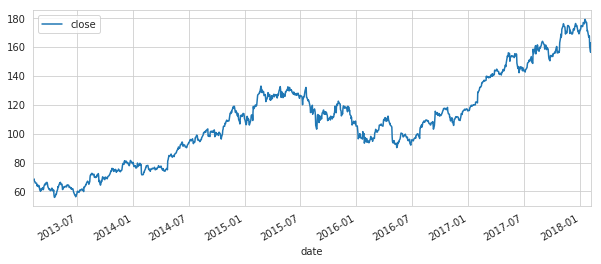

In [10]:
AAPL.plot(x='date', y='close',legend=True,figsize=(10,4))
plt.ioff()

We have stock Price for 5 years starting from 2013 to 2018 

### Volume traded for Apple Stock

In [11]:
title='VOLUME TRADED'
ylabel='Volume'
xlabel='Time'

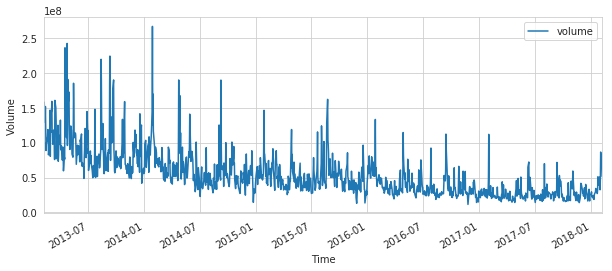

In [12]:
ax=AAPL.plot(x='date', y='volume',legend=True,figsize=(10,4));
ax.autoscale(axis='x',tight=True)  # use both if want to scale both axis
ax.set(xlabel=xlabel,ylabel=ylabel)
plt.ioff()

We can see that as the volume of stock traded is reducing as the years go by.This is because as years have gone the price of Apple stock has increased.Due to higher value of the stock the trading volume reduces.

### Plotting Stock Price Between Specified Time

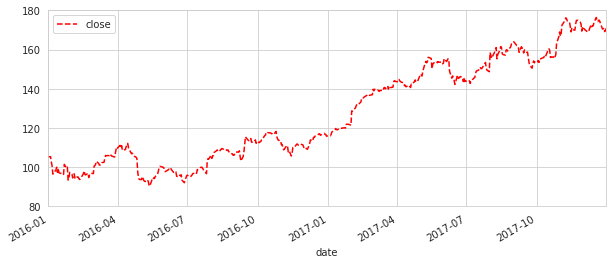

In [13]:
AAPL.plot(x='date', y='close',xlim=['2016-01-01','2017-12-31'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
plt.ioff()

We have ploted the closing Price by specifying the range of dates xlim .So in less than 2 years the stock price has almost doubled.

### Making X Axis Equally Spaced

In [14]:
"""from matplotlib import dates
AAPL.plot(x='date', y='close',xlim=['2016-01-01','2017-12-31'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
plt.ioff()
"""

"from matplotlib import dates\nAAPL.plot(x='date', y='close',xlim=['2016-01-01','2017-12-31'],ylim=[80,180],legend=True,figsize=(10,4),ls='--',c='red')\nax.set(xlabel='')\nax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))\nax.xaxis.set_major_formatter(dates.DateFormatter('%d'))\nax.xaxis.set_minor_locator(dates.MonthLocator())\nax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))\nplt.ioff()\n"

### Moving Average for Apple Stock

In [15]:
AAPL['close_10']=AAPL['close'].rolling(10).mean()
AAPL['close_50']=AAPL['close'].rolling(50).mean()

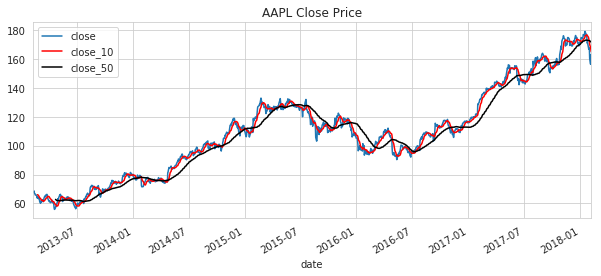

In [16]:
ax=AAPL.plot(x='date',y='close',title='AAPL Close Price',figsize=(10,4))
AAPL.plot(x='date',y='close_10',color='red',ax=ax)
AAPL.plot(x='date',y='close_50',color='k',ax=ax)
plt.ioff()

Moving average smoothens out the curve as seen in the plot.

**Daily Returns**

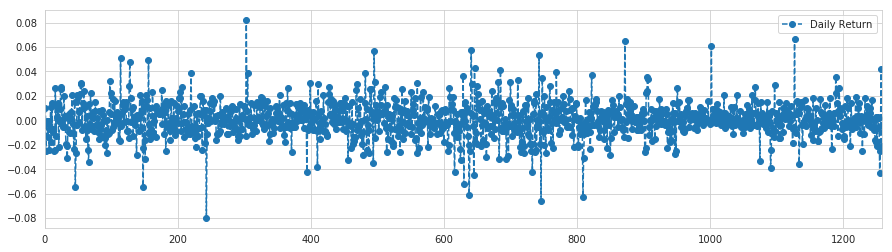

In [17]:
AAPL['Daily Return']=AAPL['close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

We can See maximum daily fluctuation in ths stock is 8 % .In stock exchange there is a limit on per day fluctuation of stock.So if the stock reaches the threshold value then the trading of the stock is stopped for that day.

**Average Daily return**

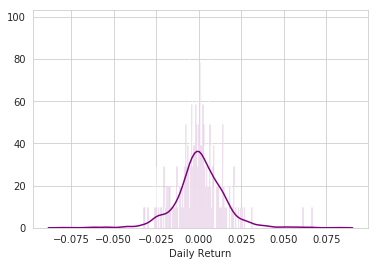

In [18]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

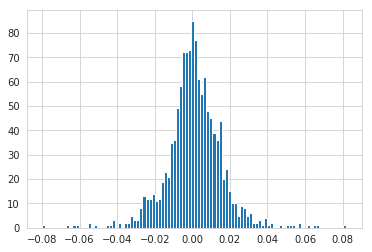

In [19]:
AAPL['Daily Return'].hist(bins=100)
plt.ioff()

So the stock fluction follows a normal distribution betweem +2% and -2%

### Checking if the Stock Prices of Tech Companies are Correlated

In [20]:
df=AAPL['date'].copy()
df=pd.DataFrame(df)
df['AAPL']=AAPL['close']
df['GOOG']=GOOG['close']
df['MSFT']=MSFT['close']
df['AMZN']=AMZN['close']
df.drop(['date'], axis = 1, inplace = True, errors = 'ignore')

In [21]:
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['date']=AAPL['date']
tech_rets.shape

(1259, 5)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


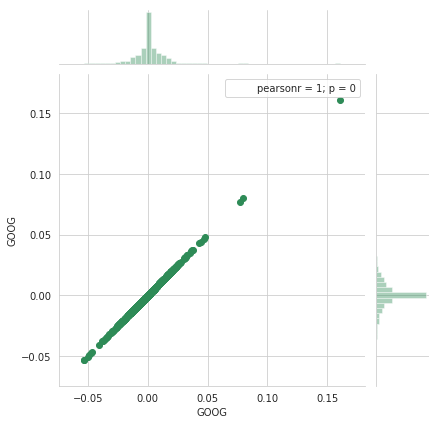

In [22]:
import scipy.stats as stats
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.ioff()

We just compared the daily percentage change of Google with itself.So the correlation is 1 as expected

### Comparing Apple & Amazon Stock

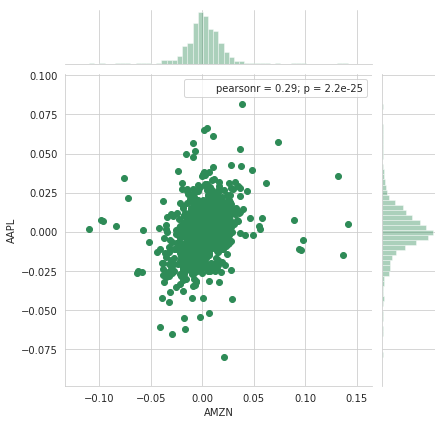

In [23]:
sns.jointplot('AMZN','AAPL',tech_rets,kind='scatter',color='seagreen').annotate(stats.pearsonr)
plt.ioff()

We can see that pearson coefficint = 0.29.If p value is close to 1 it mease higher positive correlation.If the p values is close to -1 then it means the stock prices have a higher negative correlation.So we can conclude that Apple and Amazon stock prices have small positive correlation.

**Pair Plot**

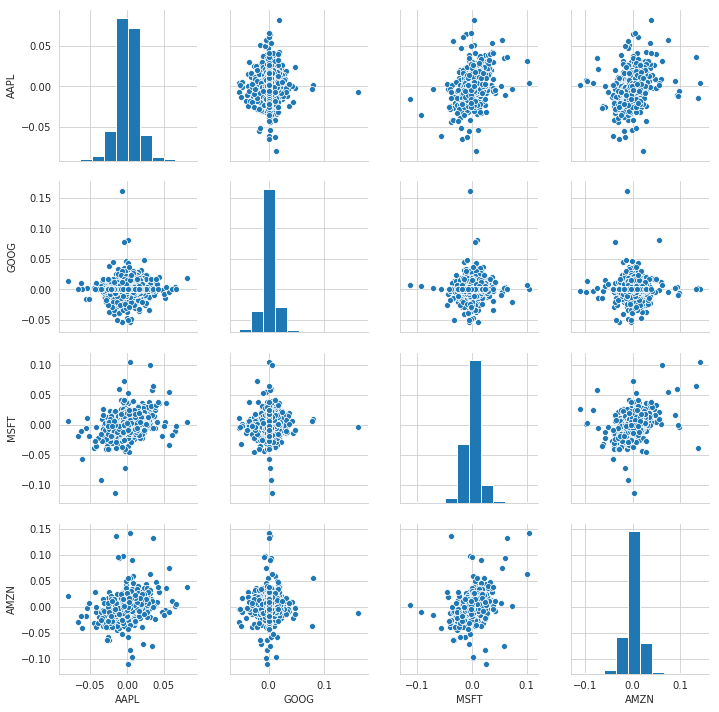

In [24]:
sns.pairplot(tech_rets.dropna())
plt.ioff()

We can see that Amazon and Google have good correlation on daily returns

### Customised Pair Grid for Daily Return

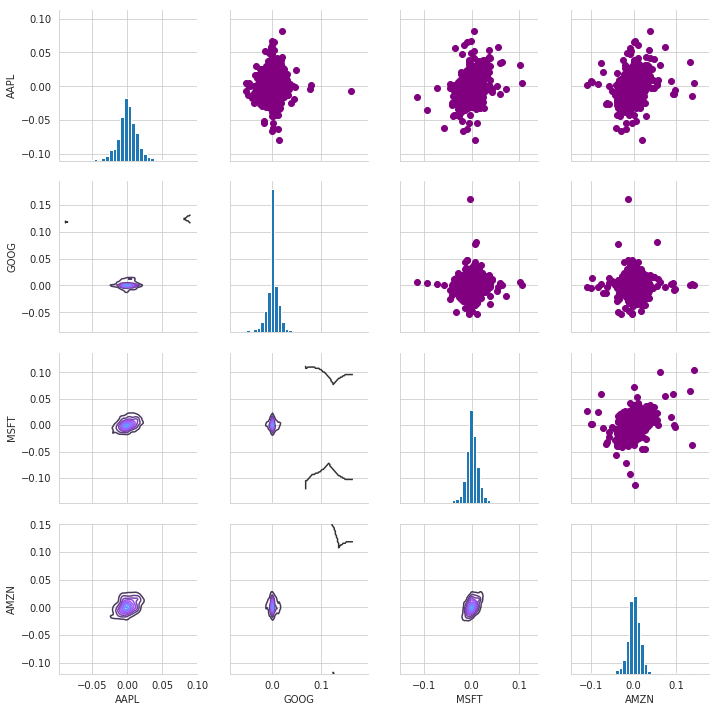

In [25]:
returns_fig=sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

### Customized Pair Grid for Close price

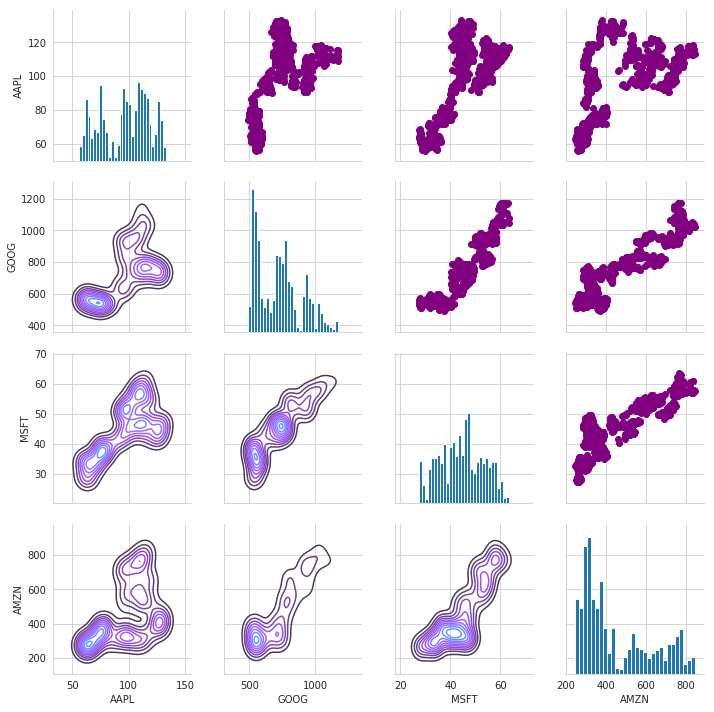

In [26]:
returns_fig=sns.PairGrid(df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)
plt.ioff()

Closing price of Google and Microsoft are well correlated

## Correlation plot for daily returns

**Heatmap Daily Return**

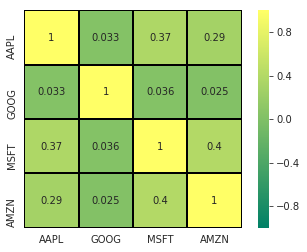

In [27]:
sns.heatmap(tech_rets.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

Microsoft and Amazon have highest daily price correlation.

### Heatmap Closing Price

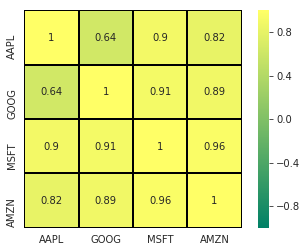

In [28]:
sns.heatmap(df.corr(),annot=True,cmap='summer',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)
plt.ioff()

All companies have Positive Correlations for Closing Price.

# 3.Risk Analysis

In [29]:
rets=tech_rets.dropna()

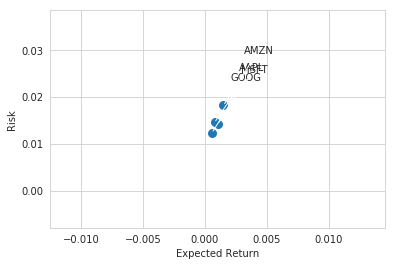

In [30]:
area=np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.3'))

Stock with Low risk and high return are the best stock to buy.We can see Amazon Stock has high risk and high returns.

### Value at Risk

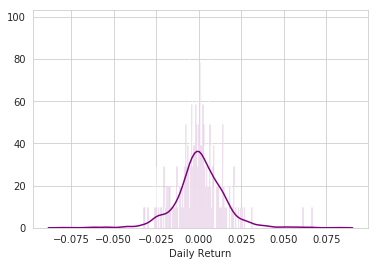

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=2000,color='purple')
plt.ioff()

In [32]:
rets.head()

,AAPL,GOOG,MSFT,AMZN,date
1,0.010422,0.002740,0.011252,-0.018095,2013-02-11
2,-0.025067,-0.005393,0.000718,0.005793,2013-02-12
3,-0.001903,0.018295,0.005380,0.041631,2013-02-13
4,-0.000899,-0.000282,0.000357,-0.000854,2013-02-14
5,-0.013780,0.004832,-0.001070,-0.015414,2013-02-15


In [33]:
rets['AAPL'].quantile(0.05)

-0.022834076249180685

-0.022 means that 95% of the times the worst daily Loss will not exceed 2.28%

# 4.Monte Carlo Analysis 

### Value at risk using Monte Carlo Method

In [34]:
days=365
dt=1/365
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [35]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [36]:
GOOG.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,568.000,568.00,552.92,558.46,13052,GOOG
1,2013-02-11,561.200,566.43,558.67,559.99,41003,GOOG
2,2013-02-12,566.890,567.00,556.93,556.97,10772,GOOG
3,2013-02-13,558.710,568.45,558.71,567.16,7932,GOOG
4,2013-02-14,565.106,604.83,562.19,567.00,146697,GOOG


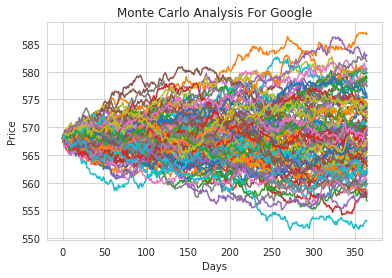

In [37]:
start_price=568
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For Google')
plt.ioff()

In [38]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

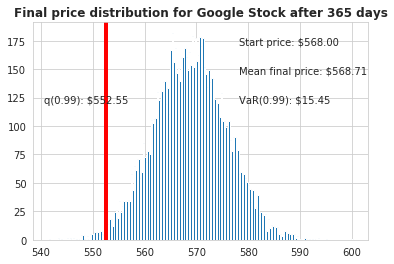

In [39]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

We can see from out simulation that the start price of the stock is 568 $ and the mean Final Price is very close at  568.69.This means that Google stock price is quite stable and doesnt fluctuate more. VaR(0.99) = 15.27 means that the maximum risk for insvestment in this stock is  15.27 which is small amount compared to the investement.

# 5.Forecasting Stock Price 

### Forecasting Apple Stock Price

In [40]:
AAPL.head()

,date,open,high,low,close,volume,Name,close_10,close_50,Daily Return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,0.010422
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,-0.025067
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,-0.001903
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,-0.000899


In [41]:
df_prophet=AAPL[['date','close']]
df_prophet=df_prophet.sort_values('date')
df_prophet

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556
...,...,...
1254,2018-02-01,167.7800
1255,2018-02-02,160.5000
1256,2018-02-05,156.4900
1257,2018-02-06,163.0300


**Renaiming the Column names to Suite Prophet Algorithm**

In [42]:
df_prophet=df_prophet.rename(columns={'date':'ds','close':'y'})
df_prophet

,ds,y
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556
...,...,...
1254,2018-02-01,167.7800
1255,2018-02-02,160.5000
1256,2018-02-05,156.4900
1257,2018-02-06,163.0300


**Creating the Prophet Model**

In [43]:
import random 
import seaborn as sns
from fbprophet import Prophet
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,62.556336,53.491378,63.733756,62.556336,62.556336,-3.874920,-3.874920,-3.874920,-1.064266,-1.064266,-1.064266,-2.810654,-2.810654,-2.810654,0.0,0.0,0.0,58.681416
1,2013-02-11,62.540455,55.133228,64.845688,62.540455,62.540455,-2.458165,-2.458165,-2.458165,-0.937652,-0.937652,-0.937652,-1.520513,-1.520513,-1.520513,0.0,0.0,0.0,60.082290
2,2013-02-12,62.535162,55.606465,65.947037,62.535162,62.535162,-2.025104,-2.025104,-2.025104,-0.916522,-0.916522,-0.916522,-1.108583,-1.108583,-1.108583,0.0,0.0,0.0,60.510057
3,2013-02-13,62.529868,55.739143,66.025304,62.529868,62.529868,-1.704515,-1.704515,-1.704515,-0.989296,-0.989296,-0.989296,-0.715219,-0.715219,-0.715219,0.0,0.0,0.0,60.825353
4,2013-02-14,62.524575,55.428737,66.050803,62.524575,62.524575,-1.381101,-1.381101,-1.381101,-1.035629,-1.035629,-1.035629,-0.345472,-0.345472,-0.345472,0.0,0.0,0.0,61.143473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619,2019-02-03,225.875070,197.493335,250.693832,201.229132,253.639232,-2.468645,-2.468645,-2.468645,2.471683,2.471683,2.471683,-4.940327,-4.940327,-4.940327,0.0,0.0,0.0,223.406425
1620,2019-02-04,226.003512,194.744602,248.437353,201.182131,253.817732,-5.545863,-5.545863,-5.545863,-0.937652,-0.937652,-0.937652,-4.608211,-4.608211,-4.608211,0.0,0.0,0.0,220.457649
1621,2019-02-05,226.131954,195.238492,250.302097,201.163059,253.996232,-5.162036,-5.162036,-5.162036,-0.916522,-0.916522,-0.916522,-4.245514,-4.245514,-4.245514,0.0,0.0,0.0,220.969918
1622,2019-02-06,226.260396,195.160297,250.390436,201.189862,254.233426,-4.846460,-4.846460,-4.846460,-0.989296,-0.989296,-0.989296,-3.857163,-3.857163,-3.857163,0.0,0.0,0.0,221.413936


**Plotting the Apple Stock Forecast for Period of One years**

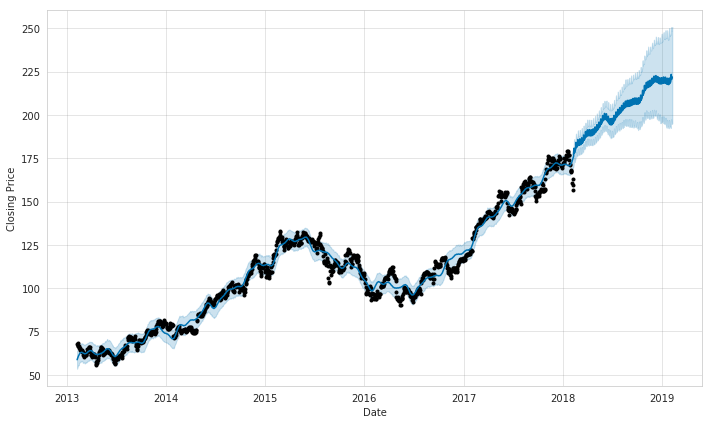

In [44]:
figure=m.plot(forecast,xlabel='Date',ylabel='Closing Price')

So the model predicts that the Apple stock Price would increase from Mar 2018 to Mar 2019.

**Plotting component of the Forecast**

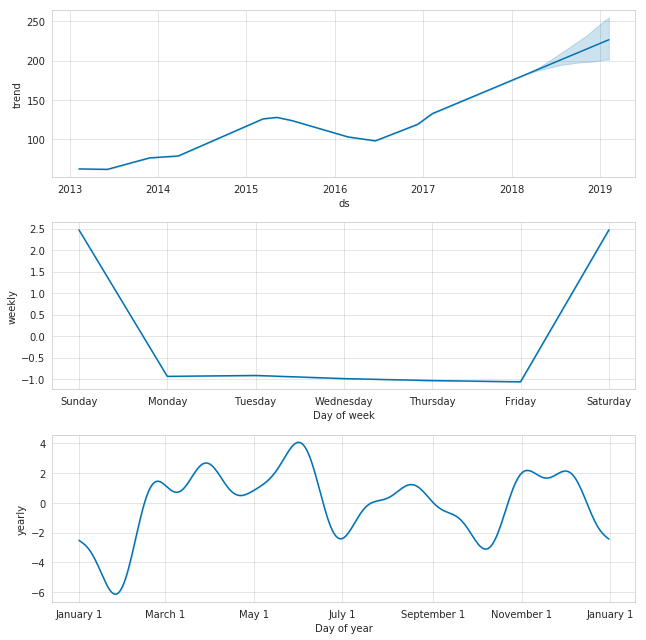

In [45]:
figure=m.plot_components(forecast)

1.Historical Trend Show that the Price of Apple stock has been increasing.Ivestors must have made good money on it

2.Weekly trend shows that the Stock price increase is highest on Tuesday then reduces as week proceeds.Please do note that Saturday and Sunday are off for the Stock Exchange.

3.The annual trend shows the seasoniality of the stock.It can be figured out the stock price peaks in month of May.

**Comapring Stock Prices**

# 6.Conclusion 

1.In this Notebook we have explored stock prices of tech stocks like Apple,Amazon,Microsoft and Google.We have looked at the historical price of stock price.We have looked at the volume of stock traded.

2.We have looked at the daily Return of stock.We have done correlation between the stock prices.Microsoft and Amazon have highest daily price correlation.maximum daily fluctuation in ths stock is 8 % .In stock exchange there is a limit on per day fluctuation of stock.So if the stock reaches the threshold value then the trading of the stock is stopped for that day.

3.Stock with Low risk and high return are the best stock to buy.We can see Amazon Stock has high risk and high returns.

4.We carried our Monte Carlo simulation for Google Stock Price.We can see from our simulation that the start price of the stock is 568 $ and the mean Final Price is very close at 568.69.This means that Google stock price is quite stable and doesnt fluctuate more. VaR(0.99) = 15.27 means that the maximum risk for insvestment in this stock is 15.27 which is small amount compared to the investement.

5.We have used Facebook Prophet to predict the stock price of Apple Stock.The model predicts that the Apple stock Price would increase from Mar 2018 to Mar 2019.Historical Trend Show that the Price of Apple stock has been increasing.Ivestors must have made good money on it.Weekly trend shows that the Stock price increase is highest on Tuesday then reduces as week proceeds.Please do note that Saturday and Sunday are off for the Stock Exchange.The annual trend shows the seasoniality of the stock.It can be figured out the stock price peaks in month of May.